In [1]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd 

In [2]:
#----------------------
# read dataset
abcd = pd.read_csv('n1p_v4.csv')

# printing first few rows
print(abcd.head())

        #  label              Sequence         A    C     D    E         F  \
0  AVP001      1         KKKKVVAATYVLF  0.153846  0.0  0.00  0.0  0.076923   
1  AVP002      1  GELDELVYLLDGPGYDPIHS  0.000000  0.0  0.15  0.1  0.000000   
2  AVP003      1         KKKKLLLPFYFFF  0.000000  0.0  0.00  0.0  0.307692   
3  AVP004      1              SWLRDIWD  0.000000  0.0  0.25  0.0  0.000000   
4  AVP005      1         KKKKLLAAFLFFF  0.153846  0.0  0.00  0.0  0.307692   

      G     H  ...  polarizability.Tr2332  charge.Tr1221  charge.Tr1331  \
0  0.00  0.00  ...               0.250000       0.083333       0.000000   
1  0.15  0.05  ...               0.157895       0.000000       0.000000   
2  0.00  0.00  ...               0.166667       0.083333       0.000000   
3  0.00  0.00  ...               0.428571       0.142857       0.142857   
4  0.00  0.00  ...               0.250000       0.083333       0.000000   

   charge.Tr2332  secondarystruct.Tr1221  secondarystruct.Tr1331  \
0       0.00

In [3]:

def computeVIF(Xdata):
  # VIF dataframe
  vif_data = pd.DataFrame()
  vif_data["feature"] = Xdata.columns

  #print(vif_data)

  # calculating VIF for each feature
  vif_data["VIF"] = [variance_inflation_factor(Xdata.values, i) for i in range(len(Xdata.columns))]

  #print(vif_data)
  #return only the features which are not multicollinear 
  return vif_data[vif_data.VIF < 10]


In [4]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#split dataset in features and target variable
X = abcd.drop(['#', 'label', 'Sequence'], axis=1) 
# Features
Y = abcd[['#', 'label', 'Sequence']] 
# Target variable
#Create subsets
X_0_256 = X.iloc[:, 0:256]
X_256_512 = X.iloc[:, 256:512]
X_512_1024 = X.iloc[:, 512:1024]
X_1024_1280 = X.iloc[:, 1024:1280]
X_1280_1536 = X.iloc[:, 1280:1536]
X_1536_1792 = X.iloc[:, 1536:1792]
X_1792_2048 = X.iloc[:, 1792:2048]
X_2048_2430 = X.iloc[:, 2048:2430]

feat_0_256 = computeVIF(X_0_256)
feat_256_512 = computeVIF(X_256_512)
feat_512_1024 = computeVIF(X_512_1024)
feat_1024_1280 = computeVIF(X_1024_1280)
feat_1280_1536 = computeVIF(X_1280_1536)
feat_1536_1792 = computeVIF(X_1536_1792)
feat_1792_2048 = computeVIF(X_1792_2048)
feat_2048_2430 = computeVIF(X_2048_2430)

selected_feat = pd.concat([feat_0_256, feat_256_512, feat_512_1024, feat_1024_1280, feat_1280_1536, feat_1536_1792, feat_1792_2048, feat_2048_2430])
selected_feat

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,feature,VIF
12,P,9.933447
13,Q,6.338486
14,R,7.532120
15,S,7.711538
16,T,6.266234
...,...,...
4,SW.9.T,9.343895
5,SW.9.W,7.295398
4,SW.22.M,3.057287
202,SW.32.L,8.673345


In [5]:
X1=X[selected_feat['feature']]

X1_0_512 = X1.iloc[:, 0:512]
X1_512_1024 = X1.iloc[:, 512:1024]
X1_1024_1370 = X1.iloc[:, 1024:1370]

feat_0_512 = computeVIF(X1_0_512)
feat_512_1024 = computeVIF(X1_512_1024)
feat_1024_1370 = computeVIF(X1_1024_1370)

selected_feat_1 = pd.concat([feat_0_512, feat_512_1024, feat_1024_1370])
selected_feat_1

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,feature,VIF
10,AF.gap0,9.193703
11,AG.gap0,9.022028
12,AH.gap0,6.866117
22,AV.gap0,4.563123
24,AY.gap0,5.929950
...,...,...
306,SW.9.T,7.704228
307,SW.9.W,4.453799
308,SW.22.M,4.483708
309,SW.32.L,1.244376


In [6]:
X2=X[selected_feat_1['feature']]
X2.insert(0, 'label',abcd['label'])
X2.insert(0,'Sequence', abcd['Sequence'])
X2.insert(0, '#', abcd['#'])
X3=X2
X3.head()
# X2_0_752 = X2.iloc[:, 0:752]

# feat1_0_752 = computeVIF(X2_0_752)

# selected_feat_2 = pd.concat([feat1_0_752])
# selected_feat_2

,#,Sequence,label,AF.gap0,AG.gap0,AH.gap0,AV.gap0,AY.gap0,CI.gap0,CL.gap0,...,SW.9.A,SW.9.D,SW.9.Q,SW.9.H,SW.9.M,SW.9.T,SW.9.W,SW.22.M,SW.32.L,charge.Tr1331
0,AVP001,KKKKVVAATYVLF,1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.000000
1,AVP002,GELDELVYLLDGPGYDPIHS,1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,AVP003,KKKKLLLPFYFFF,1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,AVP004,SWLRDIWD,1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.142857
4,AVP005,KKKKLLAAFLFFF,1,0.083333,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [ ]:
# Y = abcd[['#', 'label', 'Sequence']] 
# X2.insert(0, abcd['Sequence'])
# X2.insert(0, abcd['label'])
# X2.insert(0, abcd['#'])
# X3=X2
# X3.head()

In [7]:
X3.to_csv (r'modified_n1p_v4.csv', index = False, header=True)

In [8]:
#Loading the data
pn1=pd.read_csv('modified_n1p_v4.csv')

In [9]:
pn1.head()

,#,Sequence,label,AF.gap0,AG.gap0,AH.gap0,AV.gap0,AY.gap0,CI.gap0,CL.gap0,...,SW.9.A,SW.9.D,SW.9.Q,SW.9.H,SW.9.M,SW.9.T,SW.9.W,SW.22.M,SW.32.L,charge.Tr1331
0,AVP001,KKKKVVAATYVLF,1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.000000
1,AVP002,GELDELVYLLDGPGYDPIHS,1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,AVP003,KKKKLLLPFYFFF,1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,AVP004,SWLRDIWD,1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.142857
4,AVP005,KKKKLLAAFLFFF,1,0.083333,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [10]:
pn1.isnull().any()

#                False
Sequence         False
label            False
AF.gap0          False
AG.gap0          False
                 ...  
SW.9.T           False
SW.9.W           False
SW.22.M          False
SW.32.L          False
charge.Tr1331    False
Length: 756, dtype: bool

In [56]:
#split dataset in features and target variable
X = pn1.drop(['label', '#','Sequence'], axis=1) 
# Features
Y = pn1['label']
# Target variable
print(X,Y)

      AF.gap0  AG.gap0  AH.gap0  AV.gap0  AY.gap0   CI.gap0  CL.gap0  DA.gap0  \
0    0.000000      0.0      0.0      0.0      0.0  0.000000      0.0      0.0   
1    0.000000      0.0      0.0      0.0      0.0  0.000000      0.0      0.0   
2    0.000000      0.0      0.0      0.0      0.0  0.000000      0.0      0.0   
3    0.000000      0.0      0.0      0.0      0.0  0.000000      0.0      0.0   
4    0.083333      0.0      0.0      0.0      0.0  0.000000      0.0      0.0   
..        ...      ...      ...      ...      ...       ...      ...      ...   
855  0.000000      0.0      0.0      0.0      0.0  0.000000      0.0      0.0   
856  0.000000      0.0      0.0      0.0      0.0  0.055556      0.0      0.0   
857  0.000000      0.0      0.0      0.0      0.0  0.000000      0.0      0.0   
858  0.000000      0.0      0.0      0.0      0.0  0.000000      0.0      0.0   
859  0.000000      0.0      0.0      0.0      0.0  0.000000      0.0      0.0   

      EL.gap0  FA.gap0  ...

In [57]:
#splitting the data into training and testing
X_train,X_test,Y_train,Y_test=train_test_split(X, Y, test_size=0.2, stratify=Y)

In [71]:
from collections import defaultdict

Attributes=defaultdict(list)
Samples=defaultdict(list)
Leafs=defaultdict(list)

In [72]:
#Creating Binary Tree
from collections import defaultdict
class Node:
  def __init__(self, val, left=None, right=None):
    self.val=val
    self.impurity=[]
    self.left=left
    self.right=right
def rleaves(arr, imp):
  arr=arr
  imp=imp
  d=defaultdict(list)
  def inorder():
    nonlocal arr
    if arr[0]=="Sequence":
      arr.pop(0)
      return
    node=Node(arr.pop(0))
    node.impurity.append(imp.pop(0))
    node.left=inorder()
    if node.left==None:
      node.impurity.append(imp.pop(0))
    node.right=inorder()
    if node.right==None:
      node.impurity.append(imp.pop(0))
    return node
  root=inorder()
  left_l=[]
  right_l=[]
  l=[]
  paths_to_leaf=defaultdict(list)
  def inorder_traversal(node, address):
    if not node:
      return 
    if node.left==None and node.right==None:
      # print(address+[node.val])
      if node.impurity[1]<=0.01 and node.impurity[2]<=0.01:
        
        paths_to_leaf[node.val]=address+[node.val]
        l.append(node.val)
      elif node.impurity[1]<=0.01:
        paths_to_leaf[node.val]=address+[node.val]
        left_l.append(node.val)
      elif node.impurity[2]<=0.01:

        paths_to_leaf[node.val]=address+[node.val]
        right_l.append(node.val)
    elif node.left==None:
      # print(address+[node.val])
      if node.impurity[1]<=0.01:
        
        paths_to_leaf[node.val]=address+[node.val]
        left_l.append(node.val)
    elif node.right==None:
      # print(address+[node.val])
      if node.impurity[1]<=0.01:
        
        paths_to_leaf[node.val]=address+[node.val]
        right_l.append(node.val)
    inorder_traversal(node.left, address+[node.val])
    inorder_traversal(node.right, address+[node.val])
  inorder_traversal(root, [])
  return l, left_l, right_l, paths_to_leaf

Accuracy: 0.7906976744186046
Tree 0 Done
Accuracy: 0.7906976744186046
Tree 1 Done
Accuracy: 0.7906976744186046
Tree 2 Done
Accuracy: 0.7906976744186046
Tree 3 Done
Accuracy: 0.7906976744186046
Tree 4 Done
Accuracy: 0.7906976744186046
Tree 5 Done


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


Accuracy: 0.7906976744186046
Tree 6 Done
Accuracy: 0.7906976744186046
Tree 7 Done
Accuracy: 0.7906976744186046
Tree 8 Done


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


Accuracy: 0.7906976744186046
Tree 9 Done


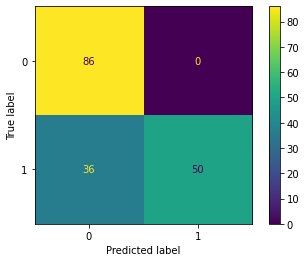

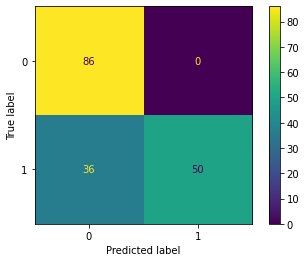

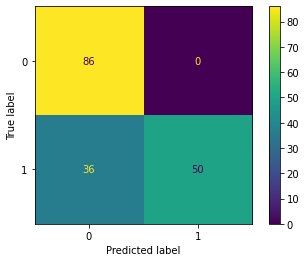

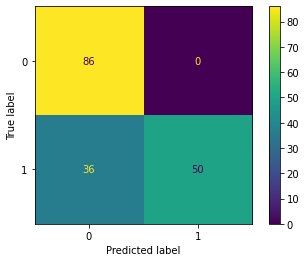

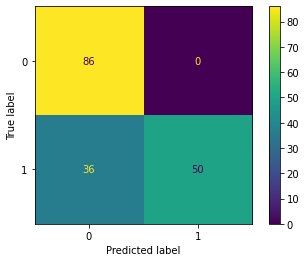

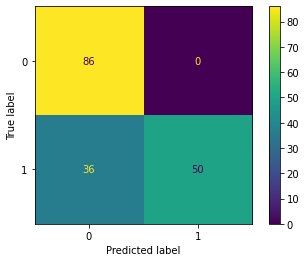

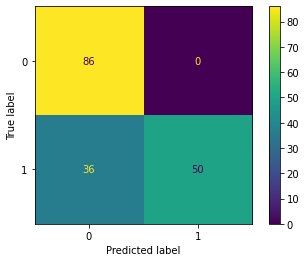

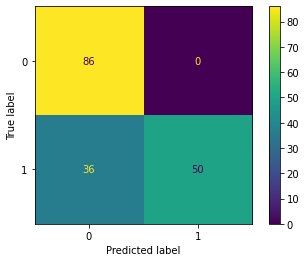

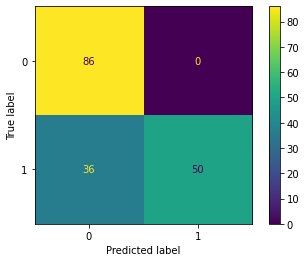

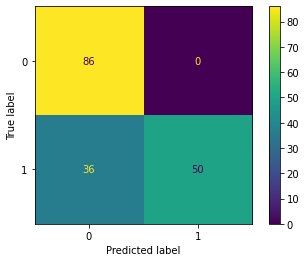

In [74]:
from sklearn import tree
import os
import matplotlib.pyplot as plt
from PIL import Image 
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus
from collections import defaultdict
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from collections import Counter
from sklearn.metrics import plot_confusion_matrix
import math
import warnings
import numpy as np
from sklearn.metrics import accuracy_score
warnings.simplefilter(action='ignore', category=FutureWarning)

#Generating different Trees
Trees=[]
if not os.path.isdir('trees'):
  os.mkdir('trees')
for i in range(10):
  #Mapping trees with index
    temp_tree=DecisionTreeClassifier(criterion="entropy", max_depth=5)
  #Fitting each tree with training data 
    temp_tree=temp_tree.fit(X, Y)
    Trees.append(temp_tree)
    cm=plot_confusion_matrix(temp_tree, X_test, Y_test) 
    print("Accuracy: {}".format(accuracy_score(temp_tree.predict(X_test), Y_test)))
  #Printing features
    print('Tree {} Done'.format(i))
    tree_map=tree.export_text(temp_tree, feature_names=list(X.columns))
  #Writing to a file
    if not os.path.isdir('trees/tree'+str(i)):
      os.mkdir('trees/tree'+str(i))
    file=open('trees/tree'+str(i)+'/Map_'+str(i), 'w')
    file.write(tree_map)
    cm.figure_.savefig('trees/tree'+str(i)+'/conf_mat.png',dpi=300)
  #Drawing Image
  #from sklearn.externals.six import StringIO  
    dot_data = StringIO()
    export_graphviz(temp_tree, out_file=dot_data,
                  feature_names= list(X.columns), class_names=True,
                  filled=True, rounded=True,
                  special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
    graph.write_png('trees/tree'+str(i)+'/Image_'+str(i)+'.png')
    Image(graph.create_png())
  #writing Indexs to file
    samples=defaultdict(list)
    for d, dec in enumerate(temp_tree.decision_path(X)):
      for j in range(temp_tree.tree_.node_count):
        if dec.toarray()[0][j] == 1:
          samples[j].append(d)
    #Some internal Manipulation for convenience 
    f=[]
    for val in temp_tree.tree_.feature:
      f.append(list(pn1.columns)[val+3])
    # Attributes[i].extend(list(filter(lambda x:x!="#", f)))
    fs=defaultdict(list)
    for k in range(len(f)):
      if f[k]!="#":
        fs[f[k]]=samples[k]
    #Getting thresholds of nodes
    thre={}
    threshold=temp_tree.tree_.threshold
    for m in range(len(f)):
      thre[f[m]]=threshold[m]
    #Getting impurities from the tree
    #getting leaves
    left=temp_tree.tree_.children_left
    right=temp_tree.tree_.children_right
    temp=rleaves(f, list(temp_tree.tree_.impurity))
    leaves, only_left, only_right, paths_to_leaf=temp[0], temp[1], temp[2], temp[3]
    for key, val in paths_to_leaf.items():
      Attributes[i].extend(val)
    final=[]
    file=open('trees/tree'+str(i)+'/'+'Samples_'+str(i)+'.csv', 'w')
    #getting specific samples of a attribute from pn1 dataset
    for key, vals in fs.items():
      # pn1_F=pn1.iloc[vals]
      # da=pn1_F.loc[:, ['#', key, 'label']]
      # print(da)
      pos, neg=False, False
      if key in leaves:
        pos=True
        neg=True
      if key in only_right:
        neg=True
      if key in only_left:
        pos=True
      if not pos and not neg:
        continue
      # try:
      #   da=da.sort_values(by=[key])
      # except:
      #   print("Exception at"+str(key))
      # Filtering positve and negtive  samples
      #Notation 
      # dap, dan=da.loc[da[key]>thre[key]], da.loc[da[key]<=thre[key]] 
      # dictp=Counter(dap.iloc[:, 1])
      # dictn=Counter(dan.iloc[:, 1])

      #Centriod Analysis

      path=paths_to_leaf[key]
      data=pn1.iloc[fs[key]]
      dapt, dant=data.loc[data[key]>thre[key]], data.loc[data[key]<=thre[key]]
      dapt=dapt[['#', 'label','Sequence']+path]
      dant=dant[['#', 'label', 'Sequence']+path]
      dant_original=dant.copy(deep=True)
      dapt_original=dapt.copy(deep=True)
      means=dant[path].mean()
      meansp=dapt[path].mean()
      for p in range(len(path)):
        dant[[path[p]]]=(dant[[path[p]]]-means[p])**2
        dapt[[path[p]]]=((dapt[[path[p]]]-meansp[p])**2)
      file.write(key+'\n')
      file.write('Threshold='+str(thre[key])+'\n')
      temp=defaultdict(list)
      try:
        #plotting positve and negative samples
        if neg:
          file.write('   Leaf 2 \n')
          dapt_original['distance']=dapt[path].sum(axis=1)
          dapt_original['distance']=dapt_original['distance'].apply(np.sqrt)
          dapt_original.nsmallest(2, 'distance').to_csv(file)
          Samples[i].extend(dapt_original.nsmallest(2, 'distance').index)
          temp[key+"Leaf2"].extend(list(dapt_original.nsmallest(2, 'distance').index))
          file.write('\n')
          dapt_original.to_csv(file)
          file.write('\n')
          # plt.bar(list(map(str, dictp.keys())), list(dictp.values()))
          # plt.title(key+"False")
          # plt.savefig('trees/tree'+str( i)+'/'+key+'False.png')
          # plt.show()
        if pos:
          # file.write('   Leaf 1 \n')
          dant_original['distance']=dant[path].sum(axis=1)
          dant_original['distance']=dant_original['distance'].apply(np.sqrt)
          dant_original.nsmallest(2, 'distance').to_csv(file)
          Samples[i].extend(dant_original.nsmallest(2, 'distance').index)
          temp[key+"Leaf1"].extend(list(dant_original.nsmallest(2, 'distance').index))
          file.write('\n')
          dant_original.to_csv(file)
          file.write('\n')
          # plt.bar(list(map(str, dictn.keys())), list(dictn.values()))
          # plt.title(key+"True")
          # plt.savefig('trees/tree'+str(i)+'/'+key+'True.png')
          # plt.show()
      except:
        print(key)
      Leafs[i].append(temp)
    # file.write('\n')
    # for key, val in samples.items():
    #     file.write(str(len(val))+"\n")
    #     file.write(str(val)+'\n')
    # file.close()

In [75]:
from operator import index
# taking union of attribute from all trees
unionattr=[]
for key , vals in Attributes.items():
  if unionattr==[]:
    unionattr=set(vals)
  else:
    unionattr=unionattr | set(vals)
print(unionattr)
attributes_file=open("Attributes_freq.csv", "w")
attr_freq_dict=dict()
for attr in unionattr:
  count=0
  for key, vals in Attributes.items():
    if attr in vals:
      count+=1
  attr_freq_dict[attr]=count
attr_df=pd.DataFrame.from_dict(attr_freq_dict, orient='index')
attr_df.to_csv(attributes_file)
unionattr=['#', 'Sequence', 'label']+list(unionattr)
# for key, vals in Attributes.items():
#   print(set(vals) & unionattr)
master=open("Master_n1p.csv", "w")
for t, s in Samples.items():
  data_final=pn1.loc[s, list(unionattr)]
  print(data_final.shape)
  data_final.insert(2, 'Tree', t)
  leaf_column=[]
  for d in Leafs[t]:
    for name, indexs in d.items():
      for i in range(len(indexs)):
        leaf_column.append(name)
  data_final.insert(3, 'Leaf', leaf_column)
  if t==0:
    data_final.to_csv(master)
  else:
    data_final.to_csv(master, header=None)

{'VL.gap0', 'RD.gap3', 'AG.gap0', 'GS.gap0', 'AE.gap1', 'KD.gap1', 'WC.gap3', 'RY.gap2', 'IR.gap3', 'TG.gap0', 'DT.gap2', 'LD.gap2', 'DW.gap3', 'SY.gap3', 'LW.gap3', 'AR.gap1', 'LC.gap3', 'KV.gap3', 'KK.gap3', 'AR.gap2', 'FI.gap2', 'VR.gap2', 'KL.gap3', 'DA.gap1', 'IR.gap2', 'CM.gap3', 'YT.gap3', 'VV.gap0', 'FR.gap0'}
(13, 32)
(13, 32)
(13, 32)
(13, 32)
(13, 32)
(13, 32)
(13, 32)
(13, 32)
(13, 32)
(13, 32)


In [ ]:
# #Note: Do not run this cell it takes longer time
# import numpy as np
# import seaborn as sns
# corr_mat=pn1[:].corr()
# mask = np.array(corr_mat)
# mask[np.tril_indices_from(mask)] = False
# fig=plt.gcf()
# fig.set_size_inches(23,9)
# sns.heatmap(data=corr_mat,mask=mask,square=True,annot=True,cbar=True)

In [ ]:
#reading all files
# from os import walk
# files=next(walk('trees'), (None, None, []))[2]
# print(len(files))

In [ ]:
# #plotting graphs for every attribute in each descion tree
# import numpy as np
# import seaborn as sns
# fig, axis=plt.subplots(5, 2, figsize=(50, 50))
# i=0
# j=0
# k=0
# imp_features=[]
# for t in Trees:
#   temp_df=pd.DataFrame()
#   temp_df=pn1.iloc[:, [1]+list(map(lambda x:x+2, filter(lambda x:x>=0, t.tree_.feature)))]
#   corr_mat=temp_df.corr()
#   for v in range(len(corr_mat.columns)):
#     if corr_mat.iloc[v, 0]>0 and corr_mat.columns[v]!='label':
#       imp_features.append(corr_mat.columns[v])
#     elif corr_mat.iloc[v, 0]<=-0.7 and corr_mat.columns[v]!='label':
#       imp_features.append(corr_mat.columns[v])
#   mask = np.array(corr_mat)
#   mask[np.tril_indices_from(mask)] = False
#   fig=plt.gcf()
#   axis[i][j].set_title("Tree"+str(k))
#   sns.heatmap(ax=axis[i][j],data=corr_mat,mask=mask,square=True,annot=True,cbar=True)
#   if j==1:
#     i+=1
#     j=0
#   else:
#     j+=1
#   k+=1

In [ ]:
# for file in files:
#   treed=open('trees/'+str(file), 'r')
#   data=[]
#   nums=[]
#   for i,line in enumerate(treed.readlines()):
#     if i>=17:
#       line=line.split("\n")
#       line=line[0]
#       line=line.strip('][').split(", ")
#       if len(line)==1:
#         nums.append(line[0])
#       else:
#         data.append(line)
#   d={}
  
  